# Miniproyecto 1: Índice NDI

La primer tarea será calcular el índice NDI que se utiliza como indicador de la salud de las plantas. Como imagen de entrada utilizaremos un mosaico de la ESCOM generado con vuelos aéreos. El objetivo de esta practica es que apliques las operaciones básicas que hemos visto y que seas capaz de mantener los valores de los pixeles en un rango de cuantización adecuado o que selecciones el tipo de dato necesario.

De acuerdo con [1], el NDI se calcula: 
 
\begin{equation}
 NDI = \frac{G - R}{G + R}
\end{equation}
 
Nota, en el artículo de Meyer[1] la división está al revés, al parecer es un error del artículo.

Adicionalmente, puedes intentar calcular un indice más elaborado como es el MGRVI o el RGBVI [2].

### Referencias

[1] Meyer, George E., and João Camargo Neto. Verification of color vegetation indices for automated crop imaging applications. Computers and electronics in agriculture 63.2 (2008): 282-293

[2] Bendig, Juliane, et al. Combining UAV-based plant height from crop surface models, visible, and near infrared vegetation indices for biomass monitoring in barley. International Journal of Applied Earth Observation and Geoinformation 39 (2015): 79-87.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

('Image type:', dtype('uint8'), 'with dimensions:', (1044L, 1155L, 3L))


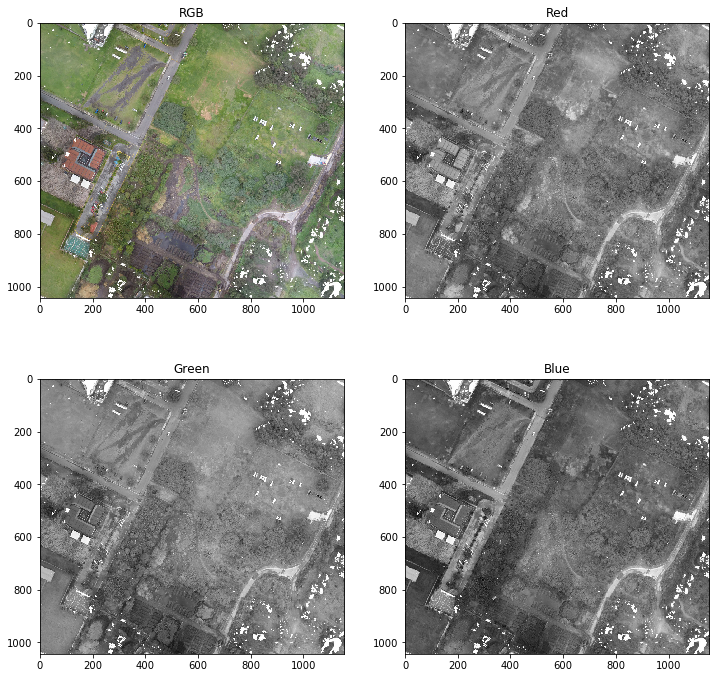

In [2]:
# Read Image
image = cv2.imread('ESCOM2_small.jpg')
print('Image type:', image.dtype, 'with dimensions:', image.shape)

# Obtaining rgb channels
b,g,r = cv2.split(image)

# Show channels
plt.figure(figsize=(12, 12))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('RGB')

plt.subplot(2,2,2)
plt.imshow(r, cmap='gray')
plt.title('Red')

plt.subplot(2,2,3)
plt.imshow(g, cmap='gray')
plt.title('Green')

plt.subplot(2,2,4)
plt.imshow(b, cmap='gray')
plt.title('Blue')
plt.show()

In [3]:
print("\nMaximum value in the red channel is: %0.1f" % (np.amax(r)))
print("Minimum value in the red channel is: %0.1f" % (np.amin(r)))

print("\nMaximum value in the green channel is: %0.1f" % (np.amax(g)))
print("Minimum value in the green channel is: %0.1f" % (np.amin(g)))

print("\nMaximum value in the blue channel is: %0.1f" % (np.amax(b)))
print("Minimum value in the blue channel is: %0.1f" % (np.amin(b)))


Maximum value in the red channel is: 255.0
Minimum value in the red channel is: 0.0

Maximum value in the green channel is: 255.0
Minimum value in the green channel is: 7.0

Maximum value in the blue channel is: 255.0
Minimum value in the blue channel is: 0.0


[[369. 325. 272. ... 312. 304. 296.]
 [254. 238. 225. ... 308. 300. 292.]
 [244. 237. 233. ... 319. 310. 298.]
 ...
 [508. 509. 507. ... 249. 243. 241.]
 [467. 491. 510. ... 251. 245. 243.]
 [289. 347. 356. ... 253. 247. 243.]]
[[ 15.  15.  18. ...  30.  30.  30.]
 [ 18.  18.  19. ...  30.  30.  30.]
 [ 24.  25.  25. ...  31.  30.  30.]
 ...
 [ -2.  -1.   3. ...   3.   3.   3.]
 [ -9.  -5.   0. ...   3.   3.   3.]
 [-13.  -9.  -4. ...   3.   3.   3.]]
-0.71900827
1.0
[[ 0.0406504   0.04615385  0.06617647 ...  0.09615385  0.09868421
   0.10135135]
 [ 0.07086615  0.07563026  0.08444444 ...  0.09740259  0.1
   0.10273973]
 [ 0.09836066  0.10548523  0.10729614 ...  0.09717868  0.09677419
   0.10067114]
 ...
 [-0.00393701 -0.00196464  0.00591716 ...  0.01204819  0.01234568
   0.01244813]
 [-0.01927195 -0.0101833   0.         ...  0.01195219  0.0122449
   0.01234568]
 [-0.0449827  -0.0259366  -0.01123596 ...  0.01185771  0.01214575
   0.01234568]]


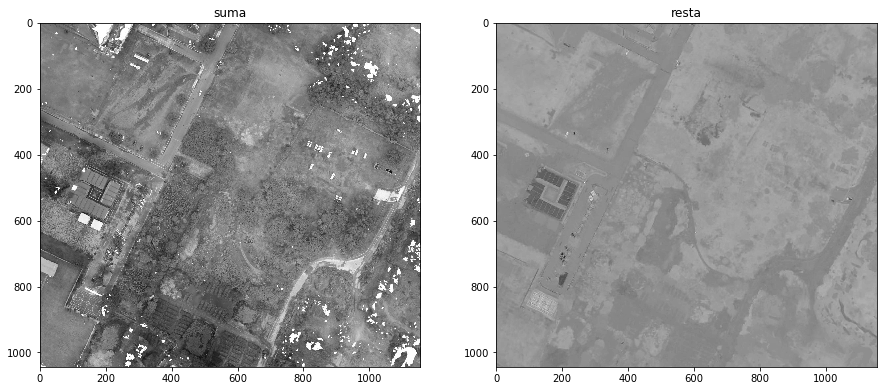

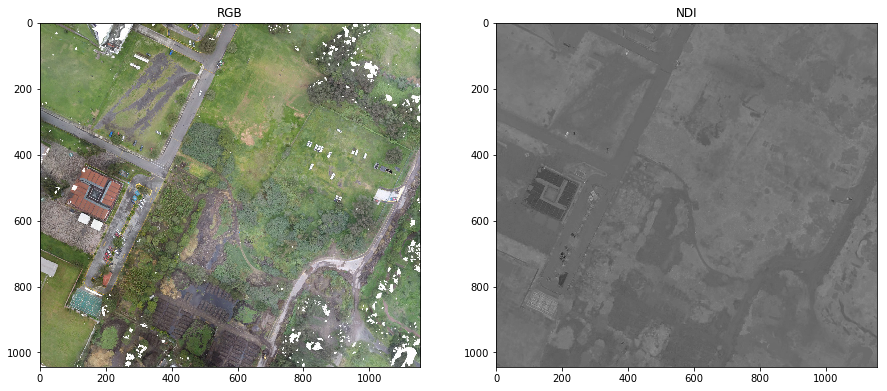

In [4]:
alpha = 1

r_float=r.astype('float32')
g_float=g.astype('float32')
b_float=b.astype('float32')

# sumamos y mentenemos en el rango
suma = cv2.addWeighted(g_float, alpha, r_float, alpha, 0)

# restamos y mentenemos en el rango
resta = cv2.addWeighted(g_float, alpha, r_float, -alpha, 0)

# División
NDI = resta/suma

plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
plt.imshow(suma, cmap='gray')
plt.title('suma')

plt.subplot(2,2,2)
plt.imshow(resta, cmap='gray')
plt.title('resta')


plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('RGB')

plt.subplot(2,2,2)
plt.imshow(NDI, cmap='gray')
plt.title('NDI')



# convertir a enteros para usar Otsu
NDI_scaled = NDI.copy()
NDI_scaled = NDI_scaled - NDI.min()
NDI_scaled = NDI_scaled * (255/NDI.max())
NDI_int = NDI_scaled.astype('uint8')

cv2.imwrite("TRY.png", NDI_int)

print(suma)
print(resta)

print(np.amin(NDI))
print(np.amax(NDI))
print(NDI)

True

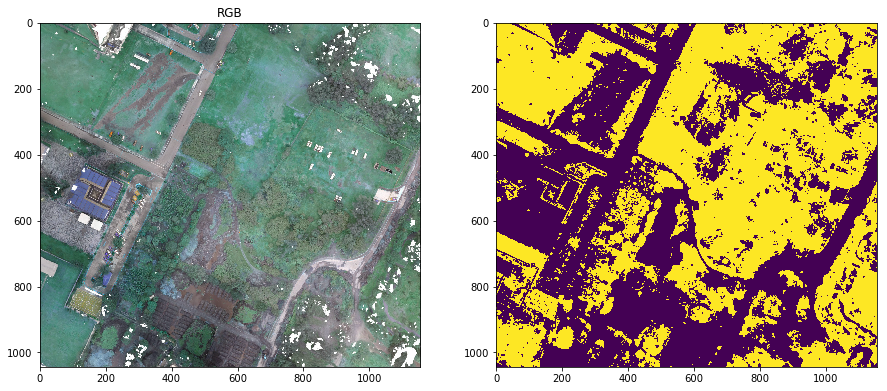

In [5]:
# Thresholding
ret2,th1 =  cv2.threshold(NDI_int, 0, 255.0, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Comparación
plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
plt.imshow(image)
plt.title('RGB')

plt.subplot(2,2,2)
plt.imshow(th1)

cv2.imwrite("binary.png", th1)


Finalmente si todo funcionó debes visualizar algo como lo siguiente:

![comparacion](comparacion.png)

Ve más allá. ¿Puedes obtener los resultados del paper[2]?

